# 10. Anchor vs Noise Hourly Comparison
This notebook creates a DNA chart comparing the hourly ride patterns of Anchors vs. Noise.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# --- Setup Paths ---
SCRIPT_DIR = Path().resolve()
PROJECT_ROOT = SCRIPT_DIR.parent
MASTER_PATH = PROJECT_ROOT / "Data" / "Processed Datasets" / "cyclistic_master_dataset.csv"
SEGMENT_PATH = PROJECT_ROOT / "Data" / "Processed Datasets" / "station_behavior_segments.csv"
SAVE_PATH = PROJECT_ROOT / "Results" / "anchor_vs_noise_dna.png"

SUCCESS: DNA Chart saved to C:\Users\Siddharth\Desktop\DIVVY PROJECT\Results\anchor_vs_noise_dna.png


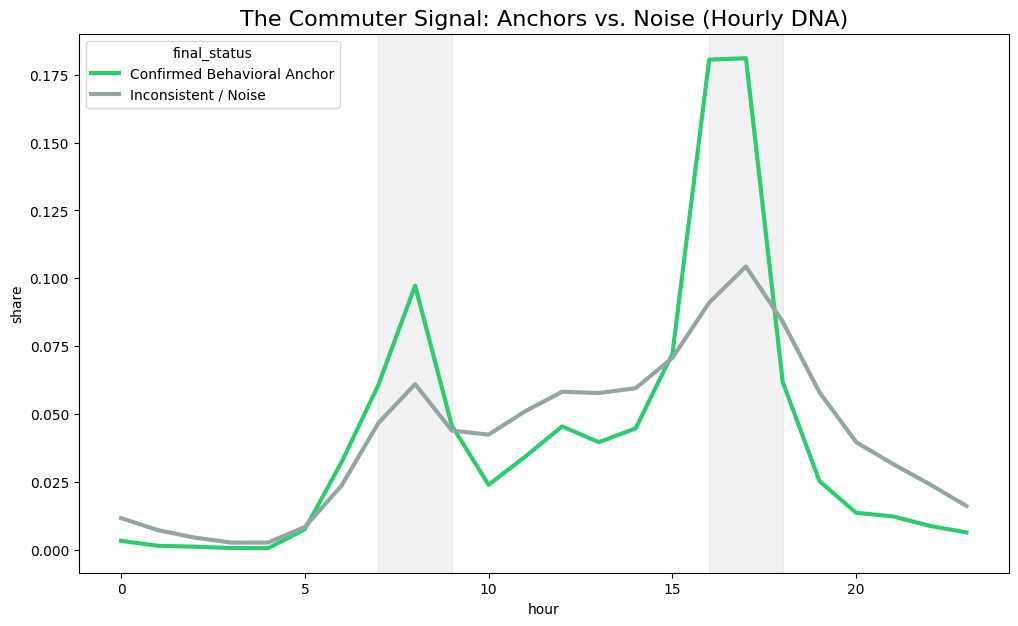

In [2]:
# Load data (Memory efficient)
if MASTER_PATH.exists() and SEGMENT_PATH.exists():
    df = pd.read_csv(MASTER_PATH, usecols=["start_station_name", "hour"])
    segments = pd.read_csv(SEGMENT_PATH, usecols=["start_station_name", "final_status"])

    # Merge and Filter
    merged = df.merge(segments, on="start_station_name")
    filtered = merged[merged["final_status"].isin(["Confirmed Behavioral Anchor", "Inconsistent / Noise"])]

    # Calculate Hourly Share (%)
    hourly_dist = filtered.groupby(["final_status", "hour"]).size().reset_index(name="rides")
    hourly_dist["share"] = hourly_dist.groupby("final_status")["rides"].transform(lambda x: x / x.sum())

    # Plot
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=hourly_dist, x="hour", y="share", hue="final_status", palette={"Confirmed Behavioral Anchor": "#2ecc71", "Inconsistent / Noise": "#95a5a6"}, linewidth=3)

    plt.title("The Commuter Signal: Anchors vs. Noise (Hourly DNA)", fontsize=16)
    plt.axvspan(7, 9, color='grey', alpha=0.1, label='Morning Rush')
    plt.axvspan(16, 18, color='grey', alpha=0.1, label='Evening Rush')

    SAVE_PATH.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(SAVE_PATH, dpi=300)
    print(f"SUCCESS: DNA Chart saved to {SAVE_PATH}")
    plt.show()
else:
    print("Required datasets not found.")